<a href="https://colab.research.google.com/github/BrunoASNascimento/image-processing-study/blob/master/monica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Help
- https://docs.opencv.org/master/d1/db7/tutorial_py_histogram_begins.html
- https://www.geeksforgeeks.org/find-and-draw-contours-using-opencv-python/
- https://docs.opencv.org/3.4/d3/dc1/tutorial_basic_linear_transform.html
- https://realpython.com/python-opencv-color-spaces/
- http://scipy-lectures.org/advanced/image_processing/
- https://pysource.com/2018/09/25/simple-shape-detection-opencv-with-python-3/


#GIT CLONE
To get data


In [42]:
!rm -rf /content/image-processing-study
!git clone https://github.com/BrunoASNascimento/image-processing-study

Cloning into 'image-processing-study'...
remote: Enumerating objects: 28, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 28 (delta 7), reused 16 (delta 2), pack-reused 0
Unpacking objects: 100% (28/28), done.


#Imports

In [43]:
from PIL import Image, ImageFilter
from google.colab.patches import cv2_imshow
import cv2
from matplotlib import pyplot as plt
import numpy as np

#Read image

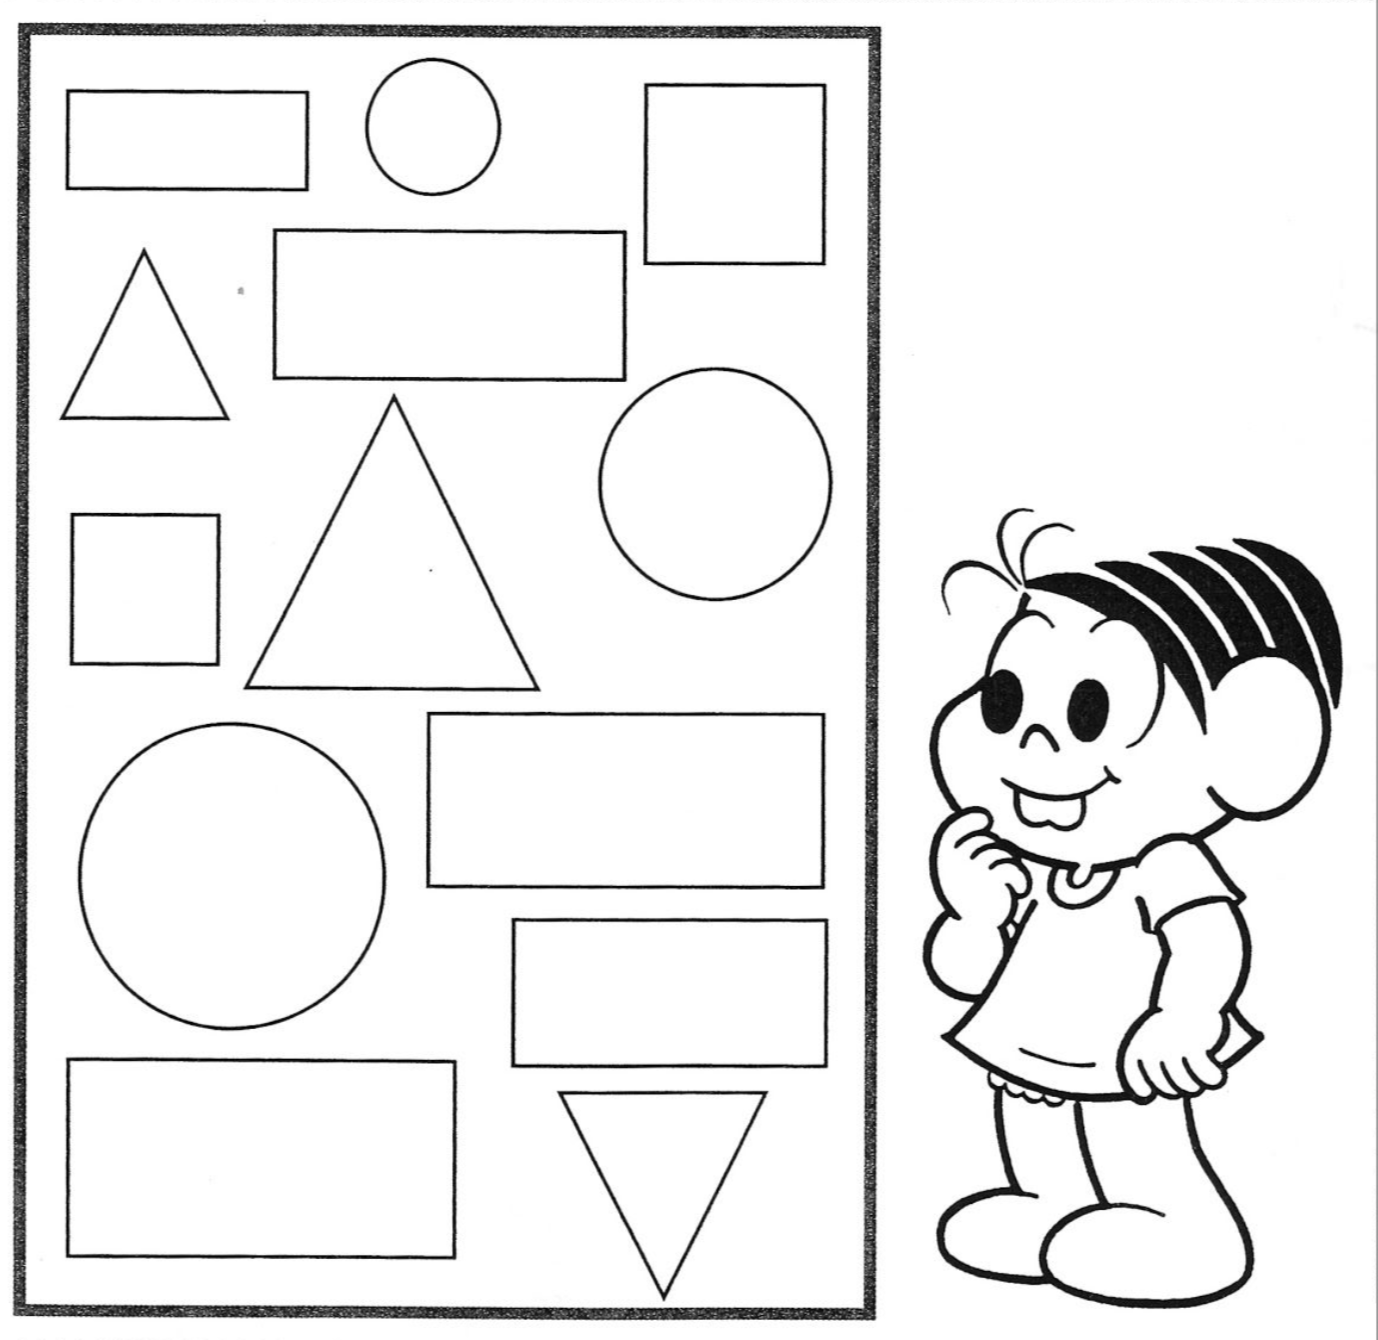

In [44]:
img = cv2.imread('/content/image-processing-study/data/monica.png', cv2.IMREAD_GRAYSCALE)
cv2_imshow(img)

#Crop image

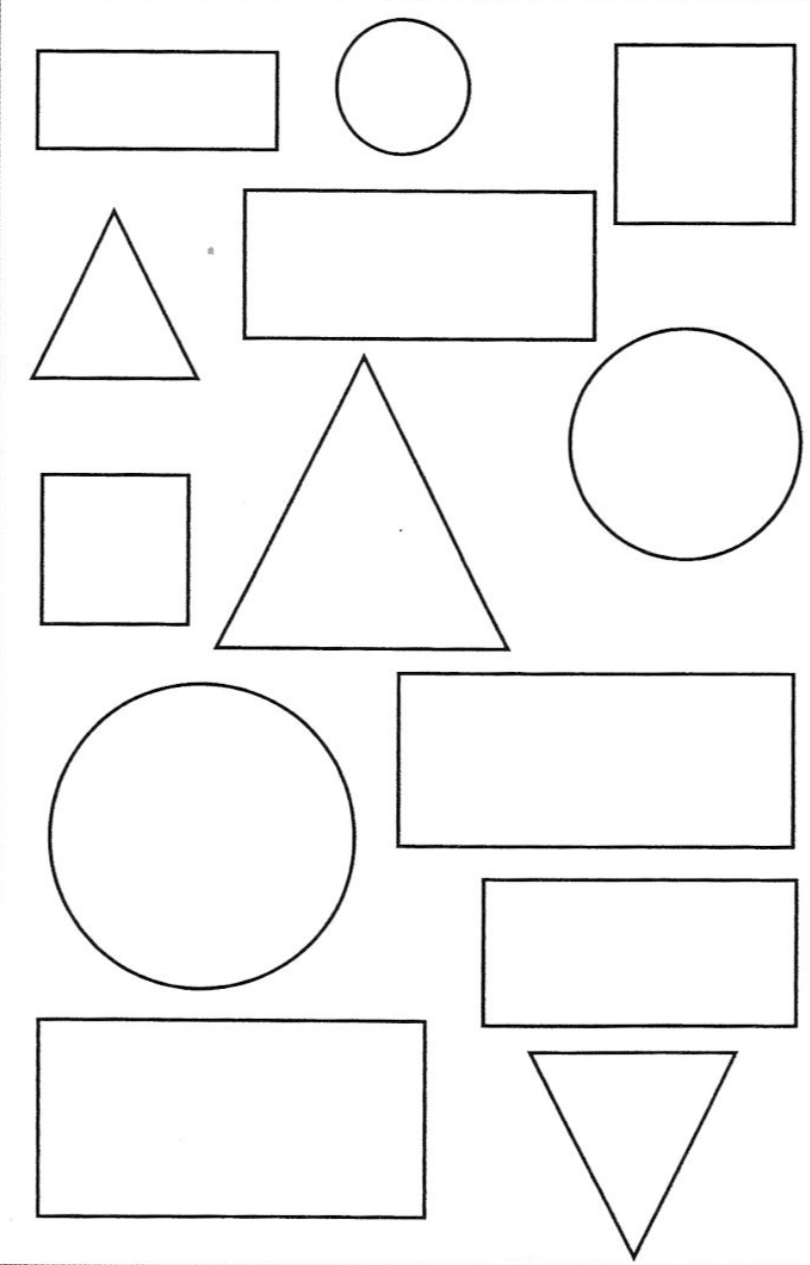

In [45]:
x=30
y=40
h=1265
w=810

img  = img[y:y+h, x:x+w]
cv2_imshow(img )

#Convert the contrast and brightness scale

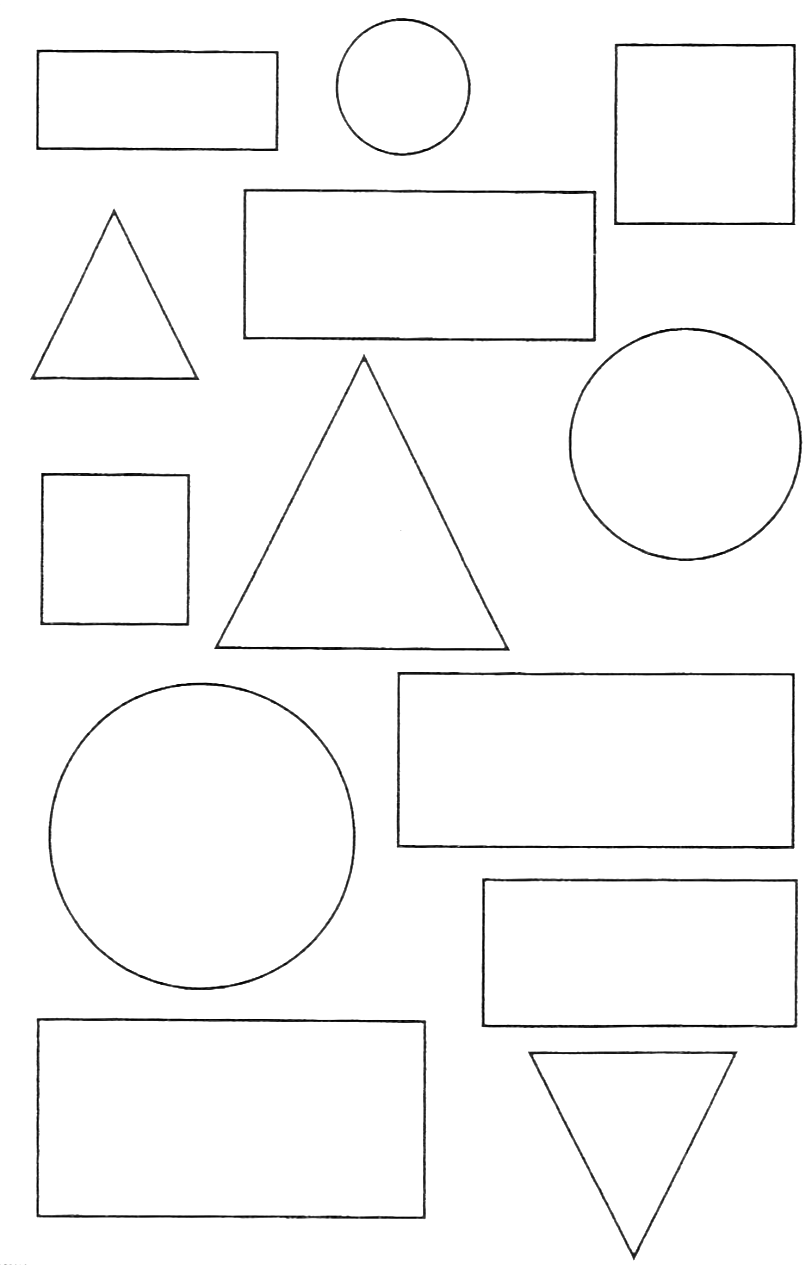

In [46]:
new_image = cv2.convertScaleAbs(img, alpha=-2, beta=5)
cv2_imshow(new_image)

#Threshold image

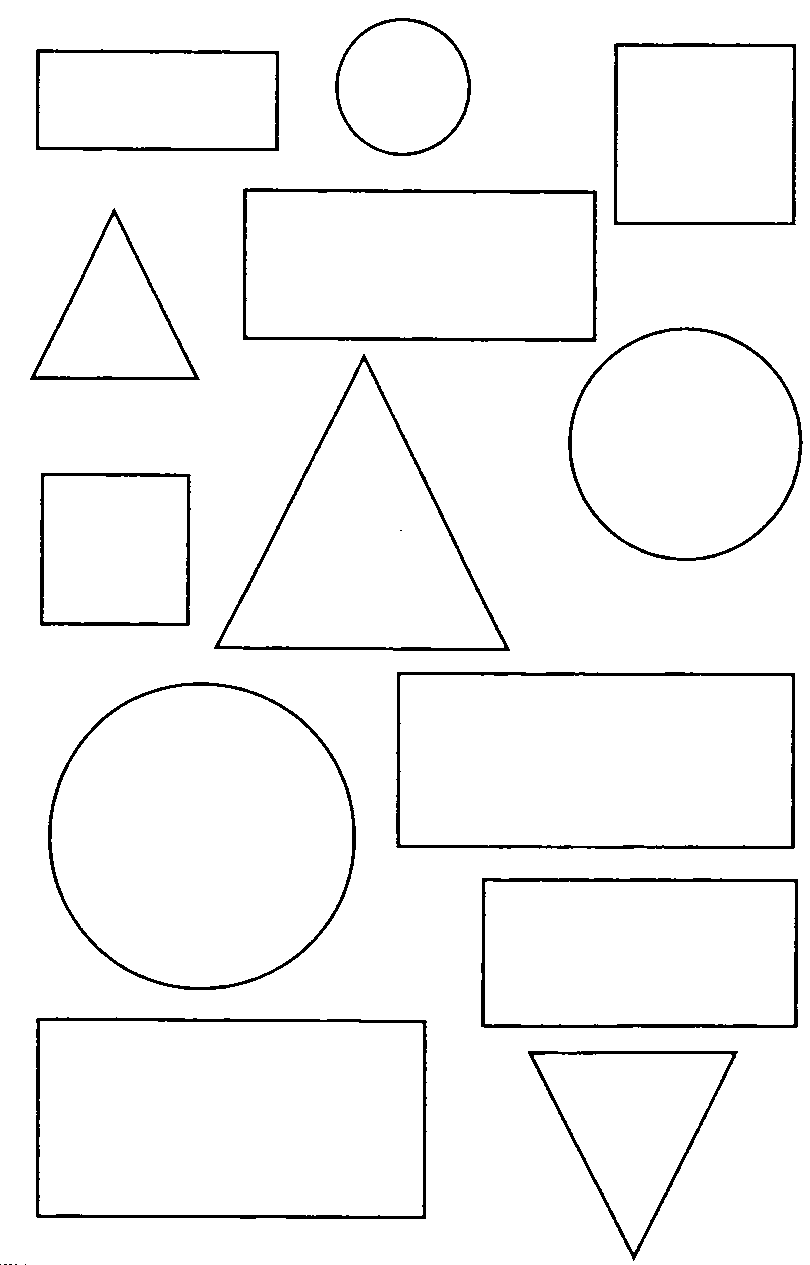

In [47]:
_,img_threshold = cv2.threshold(new_image,240,255, cv2.THRESH_BINARY)
cv2_imshow(img_threshold)

#Find Contours


In [48]:
contours, hierarchy = cv2.findContours(img_threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
len(contours) #The code found the outline inside and outside. To fix it

28

In [49]:
font = cv2.FONT_HERSHEY_COMPLEX

#Adds the name of the figure

In [50]:
control = 0
for cnt in contours:
    if control%2==0:
        approx = cv2.approxPolyDP(cnt, 0.01*cv2.arcLength(cnt, True), True)
        cv2.drawContours(img, [approx], 0, (0), 5)
        x = approx.ravel()[0]
        y = approx.ravel()[1]
        if len(approx) == 3:
            cv2.putText(img, "Triangle", (x, y), font, 1, (0))
        elif len(approx) == 4:
            cv2.putText(img, "Rectangle", (x, y), font, 1, (0)) #Square, To fix it    
        else:
            cv2.putText(img, "Circle", (x, y), font, 1, (0))
    control+=1        

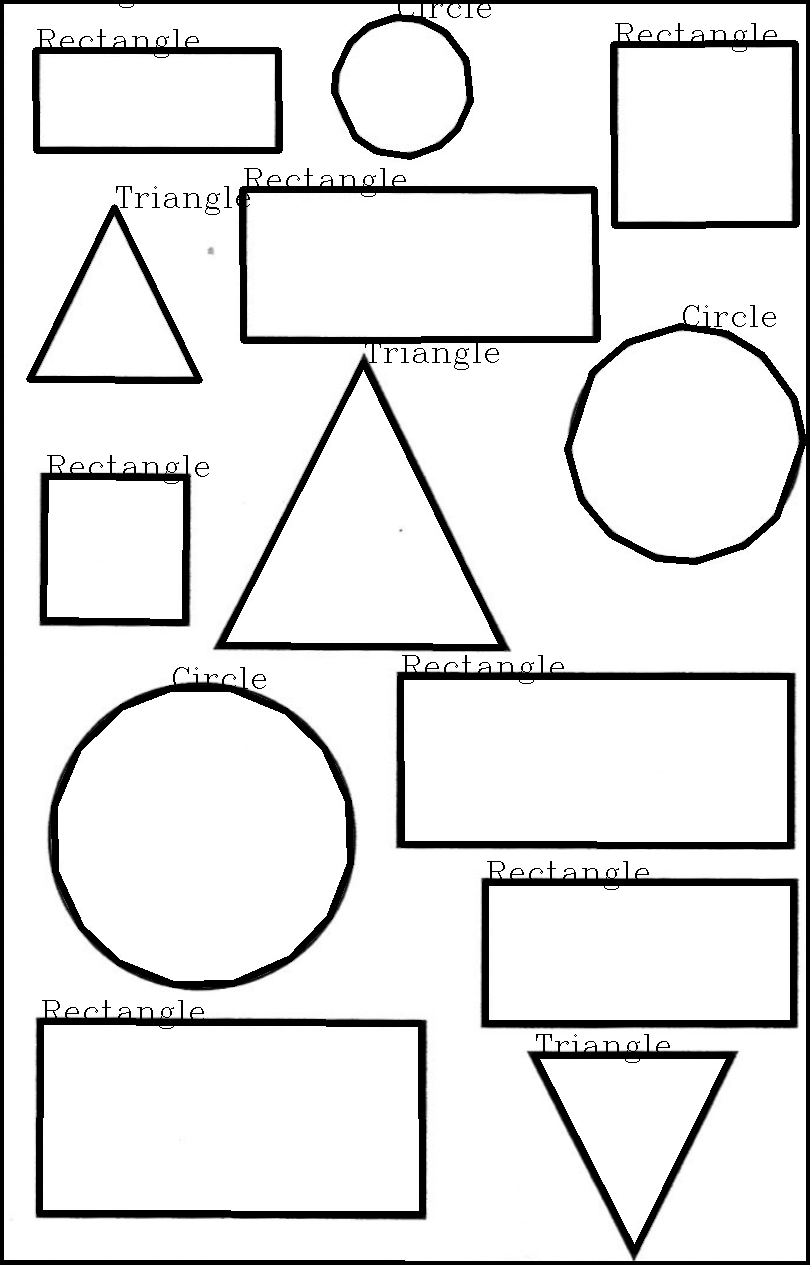

In [51]:
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()